<a href="https://colab.research.google.com/github/tanpharamut/AIprototype2022/blob/main/Tensorflow_(network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential (easy and uncomplicated, straight line flow)
2. Functional (hard a little bit, you can change flow a little bit)
3. Subclassing (very hard, you can control flow change flow like up to you)

#Sequential


###Import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

###Define

In [2]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.Input(shape=(4,)), #Frist Layer must be Input
        layers.Dense(2, activation="relu", name="layer1"),#Dense
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="Output")
    ]
)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 Output (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


###Predict

In [4]:
# Call model on a test input
x = tf.ones((5, 4))
y = model(x)

In [5]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [6]:
y

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[-0.34700435,  0.77866566, -1.1409421 ,  0.7234684 ],
       [-0.34700435,  0.77866566, -1.1409421 ,  0.7234684 ],
       [-0.34700435,  0.77866566, -1.1409421 ,  0.7234684 ],
       [-0.34700435,  0.77866566, -1.1409421 ,  0.7234684 ],
       [-0.34700435,  0.77866566, -1.1409421 ,  0.7234684 ]],
      dtype=float32)>

### Create sequential model 2


In [7]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

In [8]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


###Change Network

In [9]:
model2.pop()

In [10]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [11]:
model2.add(layers.Dense(6))

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [13]:
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[-0.20380518, -0.1303973 , -0.02509942, -0.04525886, -0.06088541,
         0.12370564],
       [-0.20380518, -0.1303973 , -0.02509942, -0.04525886, -0.06088541,
         0.12370564],
       [-0.20380518, -0.1303973 , -0.02509942, -0.04525886, -0.06088541,
         0.12370564],
       [-0.20380518, -0.1303973 , -0.02509942, -0.04525886, -0.06088541,
         0.12370564],
       [-0.20380518, -0.1303973 , -0.02509942, -0.04525886, -0.06088541,
         0.12370564]], dtype=float32)>

###Create NN Sequential complete

In [14]:
model3 = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

In [15]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


###Try train sequential model, Our own model

In [16]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [17]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 11s 0us/step


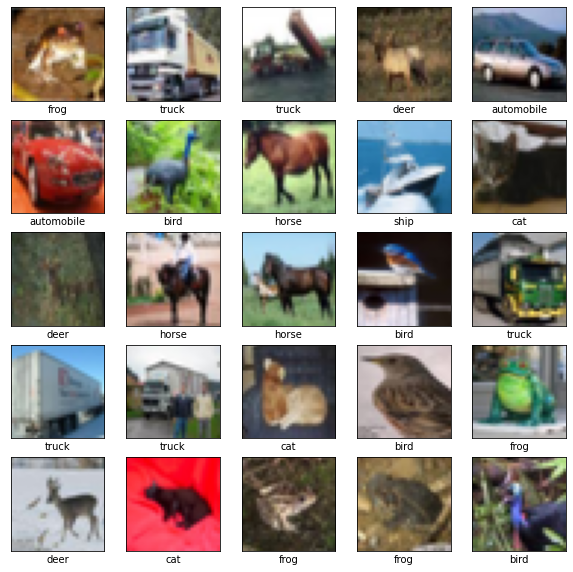

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

###Define

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

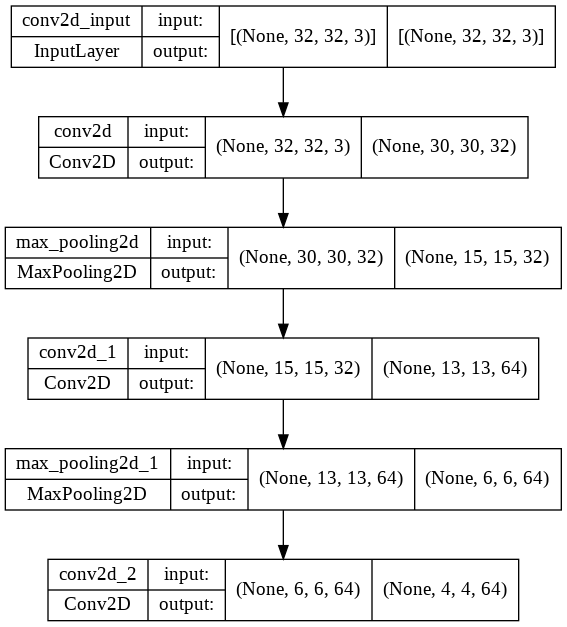

In [21]:
keras.utils.plot_model(model,show_shapes=True)

### connext with flatten and dense for predict

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

###Define training parameters

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


###Train

In [25]:
history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5144 - accuracy: 0.4490 - val_loss: 1.2687 - val_accuracy: 0.5459
Epoch 2/2
1563/1563 [==============================] - 85s 54ms/step - loss: 1.1657 - accuracy: 0.5860 - val_loss: 1.0934 - val_accuracy: 0.6111


###Test

313/313 - 4s - loss: 1.0934 - accuracy: 0.6111 - 4s/epoch - 12ms/step


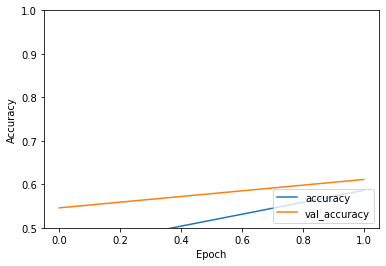

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [27]:
print(test_acc)

0.6111000180244446


#Functional


In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
input_image = keras.Input(shape=(32, 32, 3), name="img")
model = layers.Conv2D(32, (3,3), activation='relu', name="conv1")(input_image)
model = layers.MaxPooling2D((2, 2), name="maxp1")(model)
model = layers.Conv2D(64, (3,3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxp2")(model)
model = layers.Conv2D(64, (3,3), activation='relu', name="conv3")(model)
model = layers.Flatten()(model)
model = layers.Dense(64, activation='relu')(model)
Output = layers.Dense(10)(model)

In [30]:
my_model = keras.Model(input_image, Output, name="mymodel")

In [31]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxp1 (MaxPooling2D)        (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxp2 (MaxPooling2D)        (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0   

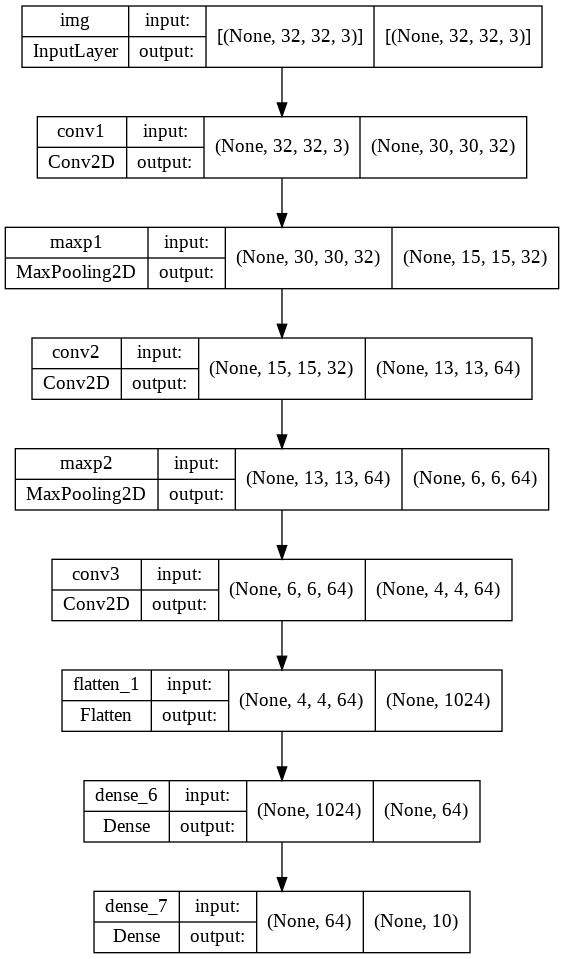

In [32]:
keras.utils.plot_model(my_model,show_shapes=True)

In [33]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
history = my_model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5022 - accuracy: 0.4538 - val_loss: 1.2325 - val_accuracy: 0.5561
Epoch 2/2
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1382 - accuracy: 0.5987 - val_loss: 1.0619 - val_accuracy: 0.6219


313/313 - 4s - loss: 1.0619 - accuracy: 0.6219 - 4s/epoch - 12ms/step


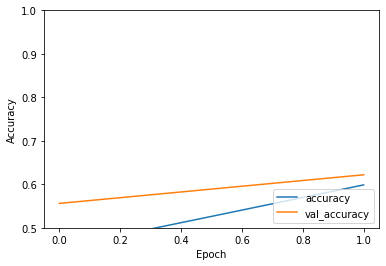

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [38]:
print(test_acc)

0.6219000220298767


In [ ]:
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10))

#ResNet

In [48]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_11 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_10[0][0]']              
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_11[0][0]']              
                                                                                         

In [49]:
resnet_model = keras.Model(inputs, outputs, name="mymodel")

In [50]:
resnet_model.summary()

Model: "mymodel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_11 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_10[0][0]']              
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_11[0][0]']              
                                                                                            

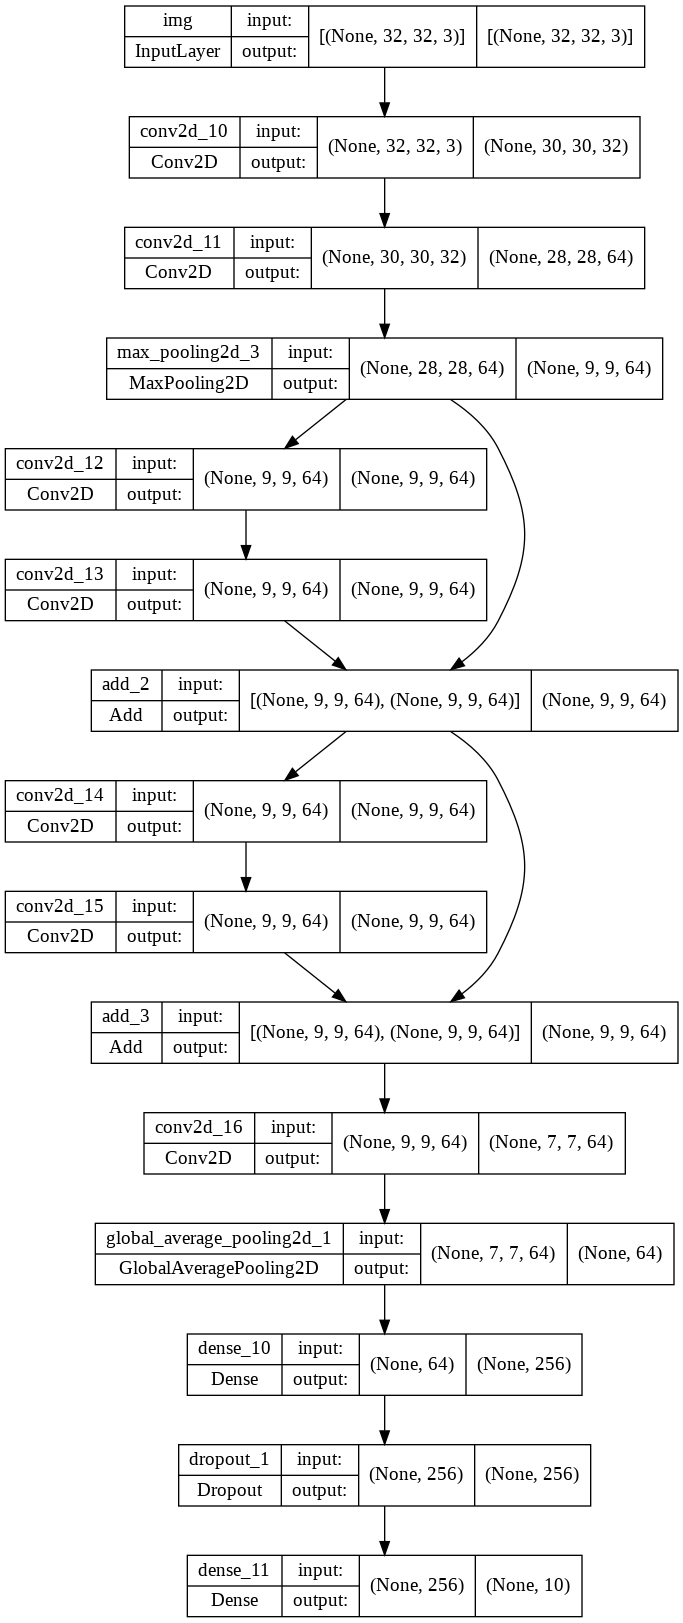

In [51]:
keras.utils.plot_model(resnet_model,show_shapes=True)

In [52]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
history = resnet_model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 282s 180ms/step - loss: 1.6840 - accuracy: 0.3536 - val_loss: 1.4032 - val_accuracy: 0.4872
Epoch 2/2
1563/1563 [==============================] - 282s 180ms/step - loss: 1.2048 - accuracy: 0.5629 - val_loss: 1.0245 - val_accuracy: 0.6267


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc =resnet_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

#homework modify my_model ให้มี skip conections เเล้ว train-test เทียบกับ 'my_model' เเละ 'resnet_model'